# Practical Concepts in Machine Learning

Let us explore a number of practical concepts that can be very important in machine learning applications. These concepts include

- Feature Scaling
- Feature Selection
- Pipelining
- Cross Validation
- Grid Search
- Validation/Learning Curves

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

from helper import *

Descriptions of the columns can be found [here](http://stat-computing.org/dataexpo/2009/the-data.html).

In [2]:
df = pd.read_csv(
    '~/2001.csv',
    encoding='latin-1',
    usecols=(1, 2, 3, 5, 7, 13, 15, 16, 18)
    )

For simplicity, we use only 1% percent of flights that departed from ORD. We also convert the `DepDelay` variables to a binary indicator, which we try to predict from the remaining attributes.

In [3]:
local = df[df['Origin'] == 'ORD'].drop('Origin', axis=1) # we don't need the Origin column anymore.
local = local.dropna().reset_index(drop=True)

# 1 if a flight was delayed, 0 if not.
y = pd.DataFrame((local['DepDelay'] > 0).astype(np.int), columns=['DepDelay'])
local = local.drop('DepDelay', axis=1)

np.random.seed(0)
idx = np.random.choice(len(local), int(len(local) / 100))
X = local.loc[idx, :]
y = y.loc[idx, :]

del df # we don't need this big data frame anymore

## Feature Scaling

In [4]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
print(X.head())

      Month  DayofMonth  DayOfWeek  CRSDepTime  CRSArrTime   AirTime  Distance
0  1.649049    0.837020   1.529541   -0.731371   -0.699318 -0.842368 -0.881512
1 -0.388869    1.062662   0.526987    0.995111    1.110583 -0.085181 -0.217950
2 -0.097738   -0.516829  -1.478120    0.115162    0.265822 -0.352423 -0.336576
3  1.649049    1.288304   0.025710    1.663427    1.564642  1.844903  1.759760
4 -0.388869   -0.065546  -0.976843    1.284715    1.389354 -0.411811 -0.306919


## Feature Selection

We use [Recursive Feature Elimination](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) to determine the most important features 

In [5]:
rfe, rfe_columns, rfe_ranking = select_features(X, y, check_random_state(0))

We can print the most important features:

In [6]:
rfe_columns

['CRSDepTime', 'AirTime', 'Distance']

## Pipeline

We construct a pipeline to employ to select the k best features from a data set along with an SVC classification.

In [7]:
anova_svm, y_pred = pipeline_anova_svm(X, y, random_state=check_random_state(0))

We don't expect a great accuracy, but it would be useful to print it anyway:

In [8]:
accuracy_score(y_pred,y)

0.57165060615480257

## Grid Search

We use a [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) object to compute the best value for the C parameter when running the SVC algorithm.

In [9]:
clf, best_C, best_cv_score = grid_search_c(
    X, y,
    split_rs=check_random_state(0),
    svc_rs=check_random_state(0),
    c_vals=np.logspace(-5, 2, 20)
    )

Let's check the values:

In [10]:
best_C

0.0088586679041008226

In [11]:
best_cv_score

0.57248348231636226

## Validation Curves

We compute and display the validation curve for SVM-C.

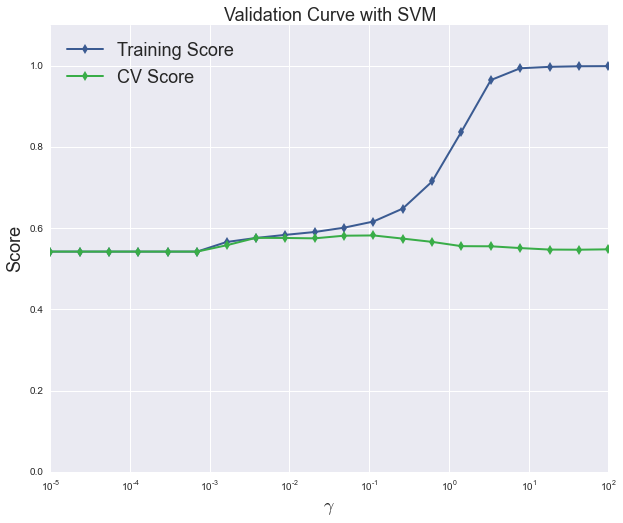

In [12]:
param_range = np.logspace(-5, 2, 20)
ax_vl = plot_validation_curve(X, y, param_range=param_range)